# Titanic: Machine Learning from Disaster

# Definição do Escopo

* Realizar o processo de Data Munging no dataset do tytanic;
* Gerar arquivos CSVs para o próximos projeto para aplicar os algoritmos machine learning;
* Os arquivos devem passar pelo processo de:
    * Análise Exploratória de Dados;
    * Análise Estatística de Dados;
    * Pré-Processamento;


# Objetivo

Gerar dataset(csv) limpo e formatado para aplicar no projeto algoritmos de ML para prever: 
* Que tipos de pessoas provavelmente sobreviveriam?

# Funções

In [1]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

# Coleta de dados

https://www.kaggle.com/c/titanic/data

<b>PassengerId</b> = Passageiro ID<br>
<b>Survived</b> = Sobreviventes<br>
<b>Pclass</b> = Classe do Ingresso<br>
<b>Name</b> = Nome<br>
<b>Sex</b> = Sexo<br>
<b>Age</b> = Idade<br>
<b>SibSp</b> = Parentes Irmão/Irmã/Marido/Esposa<br>
<b>Parch</b> = Parentes Mãe/Pai/Filhos/Enteado<br>
<b>Ticket</b> = Passagem Número<br>
<b>Fare</b> = Passagem Preço<br>
<b>Cabin</b> = Cabine<br>
<b>Embarked</b> = Porto de Embarque(C = Cherbourg; Q = Queenstown; S = Southampton)<br>

## Fontes

In [2]:
### Importando as libs
import pandas as pd
import numpy as np

In [3]:
### Coletando as fontes de dados
train_csv = pd.read_csv('train.csv', sep = ',', encoding = 'UTF-8')
test_csv = pd.read_csv('test.csv', sep = ',', encoding = 'UTF-8')

## Validação - Importação dos dados

In [4]:
test_csv.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
train_csv.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Renomeando - Colunas

In [6]:
### Colunas de Teste
test=test_csv.copy()
colunasTeste=['PassageiroId','Classe','Nome','Sexo','Idade','ParentesIrmao','ParentesFilhos',
              'PassagemNumero','PassagemPreco','Cabine','PortoEmbarque']
test.columns=colunasTeste

In [7]:
### Colunas de Treino
train=train_csv.copy()
colunasTreino = colunasTeste[:]
colunasTreino.insert(1,'Sobreviventes')
train.columns=colunasTreino

## Validação - Renomeação das colunas

In [8]:
test.head(2)

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [9]:
train.head(2)

,PassageiroId,Sobreviventes,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Join Metadados

In [10]:
### União do Treino e Teste 
frames = [train[colunasTeste], test]
join = pd.concat(frames)

## Coleta de dados - Conclusão

<b>Dados de treino:</b> Possuí informações dos sobreviventes, então podemos utilizar algoritmos machine learning supervisionado.
<br>
<b>Dados de teste:</b> As previsões dos dados de teste deve ser enviado para o Kaggle, conforme o modelo: gender_submission.csv
<br>
<b>Join Metadados:</b> A união dos datasets de treino e teste vai ajudar no processo de análise exploratória dos dados.
<br>
<b>Join Metadados:</b> Foi excluído a coluna sobreviventes.

# Análise Exploratória de Dados

## Análise Descritiva

### Visualizar - 1ª Linhas

In [11]:
### Treino
train.head(20)

,PassageiroId,Sobreviventes,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
### Teste
test.head(20)

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Quais as dimensões do dataset?


In [13]:
### Treino
train.shape

(891, 12)

In [14]:
### Teste
test.shape

(418, 11)

In [15]:
### JOIN
join.shape

(1309, 11)

<b>Dados de treino:</b> A quantidade de dados de treino aparentemente não é suficiente para ter um modelo com alta precisão.
<br>

### Quais são os tipos das colunas?

In [16]:
### Treino
train.dtypes

PassageiroId        int64
Sobreviventes       int64
Classe              int64
Nome               object
Sexo               object
Idade             float64
ParentesIrmao       int64
ParentesFilhos      int64
PassagemNumero     object
PassagemPreco     float64
Cabine             object
PortoEmbarque      object
dtype: object

In [17]:
### Teste
test.dtypes

PassageiroId        int64
Classe              int64
Nome               object
Sexo               object
Idade             float64
ParentesIrmao       int64
ParentesFilhos      int64
PassagemNumero     object
PassagemPreco     float64
Cabine             object
PortoEmbarque      object
dtype: object

In [18]:
### Join
join.dtypes

PassageiroId        int64
Classe              int64
Nome               object
Sexo               object
Idade             float64
ParentesIrmao       int64
ParentesFilhos      int64
PassagemNumero     object
PassagemPreco     float64
Cabine             object
PortoEmbarque      object
dtype: object

### Quais as colunas que tem valores nulos?

In [19]:
### Treino
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassageiroId      891 non-null int64
Sobreviventes     891 non-null int64
Classe            891 non-null int64
Nome              891 non-null object
Sexo              891 non-null object
Idade             714 non-null float64
ParentesIrmao     891 non-null int64
ParentesFilhos    891 non-null int64
PassagemNumero    891 non-null object
PassagemPreco     891 non-null float64
Cabine            204 non-null object
PortoEmbarque     889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
### Teste
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassageiroId      418 non-null int64
Classe            418 non-null int64
Nome              418 non-null object
Sexo              418 non-null object
Idade             332 non-null float64
ParentesIrmao     418 non-null int64
ParentesFilhos    418 non-null int64
PassagemNumero    418 non-null object
PassagemPreco     417 non-null float64
Cabine            91 non-null object
PortoEmbarque     418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
### Join
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassageiroId      1309 non-null int64
Classe            1309 non-null int64
Nome              1309 non-null object
Sexo              1309 non-null object
Idade             1046 non-null float64
ParentesIrmao     1309 non-null int64
ParentesFilhos    1309 non-null int64
PassagemNumero    1309 non-null object
PassagemPreco     1308 non-null float64
Cabine            295 non-null object
PortoEmbarque     1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Quais total de valores nulos por coluna?

In [22]:
### Treino
train.isnull().sum()

PassageiroId        0
Sobreviventes       0
Classe              0
Nome                0
Sexo                0
Idade             177
ParentesIrmao       0
ParentesFilhos      0
PassagemNumero      0
PassagemPreco       0
Cabine            687
PortoEmbarque       2
dtype: int64

In [23]:
### Teste
test.isnull().sum()

PassageiroId        0
Classe              0
Nome                0
Sexo                0
Idade              86
ParentesIrmao       0
ParentesFilhos      0
PassagemNumero      0
PassagemPreco       1
Cabine            327
PortoEmbarque       0
dtype: int64

In [24]:
### Join
join.isnull().sum()

PassageiroId         0
Classe               0
Nome                 0
Sexo                 0
Idade              263
ParentesIrmao        0
ParentesFilhos       0
PassagemNumero       0
PassagemPreco        1
Cabine            1014
PortoEmbarque        2
dtype: int64

### Sumário Estatístico

Resumo estatístico do DataFrame, com quartis, mediana, etc

<ul>
<li>count = quantidade de registros não nulo</li>
<li>mean = média aritmética</li>
<li>std = desvio padrão</li>
<li>min = minímo valor</li>
<li>25% = Primeiro Quartil</li>
<li>50% = Segundo Quartil = Mediana</li>
<li>75% = Terceiro Quartil</li>
<li>max = maior valor</li>
</ul>

### Dados - Brutos

In [25]:
### Treino 
train.describe()

,PassageiroId,Sobreviventes,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
### Teste
test.describe()

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
### Join
join.describe()

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


### Sumário Estatístico(Dados Brutos) - Conclusão 

* **PassageiroId:** 
    * Treino: Desconsiderar os valores relacionados a coluna.
    * Teste:  Desconsiderar os valores relacionados a coluna.
    * União:  Desconsiderar os valores relacionados a coluna.
* **Sobreviventes:** 
    * Treino: Aproximadamente 38% sobreviveu - mean 0.383838
* **Classe:** 
    * A mediana é a melhor representação da Classe.(50% do Quartil);  
    * Corresponde a 3ª classe como maioria nos dados de treino e test.
    * A mediana é a melhor representação da Classe;     
* **Idade:** 
* **ParentesIrmao:**
* **ParentesFilhos:** 
* **PassagemPreco:**

### É possível trabalhar com dataset removendo os valores nulos?

In [28]:
join.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 414
Data columns (total 11 columns):
PassageiroId      270 non-null int64
Classe            270 non-null int64
Nome              270 non-null object
Sexo              270 non-null object
Idade             270 non-null float64
ParentesIrmao     270 non-null int64
ParentesFilhos    270 non-null int64
PassagemNumero    270 non-null object
PassagemPreco     270 non-null float64
Cabine            270 non-null object
PortoEmbarque     270 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 25.3+ KB


#### Conclusão
* Se remover todas as colunas com valores nulos fica inviável trabalhar com dataset;
* A coluna Cabine existe vários valores nulos;


### Dados - Sem nulos

In [29]:
colunasSemCabine = colunasTeste[:]
colunasSemCabine.remove('Cabine')

In [30]:
#Valor total - bruto: 891
#Valor total - Sem Nulos: 712
train_dropna=train.dropna(subset=colunasSemCabine)
train_dropna.describe()

,PassageiroId,Sobreviventes,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [31]:
#Valor total - bruto: 418
#Valor total - Sem Nulos: 331
test_dropna=test.dropna(subset=colunasSemCabine)
test_dropna.describe()

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,2.141994,30.181269,0.483384,0.398792,40.982087
std,122.910180,0.846251,14.104573,0.875004,0.811582,61.228558
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.500000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1100.000000,2.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.500000,3.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,3.000000,76.000000,8.000000,6.000000,512.329200


In [32]:
#Valor total - bruto: 1309
#Valor total - Sem Nulos: 1043
join_dropna=join.dropna(subset=colunasSemCabine)
join_dropna.describe()

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,655.391179,2.209012,29.813202,0.504314,0.421860,36.603024
std,377.527036,0.840685,14.366254,0.913080,0.840655,55.753648
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,326.500000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,662.000000,2.000000,28.000000,0.000000,0.000000,15.750000
75%,973.500000,3.000000,39.000000,1.000000,1.000000,35.077100
max,1307.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Balanceamento

### Qual a quantidade de sobreviventes nos dados de treino?

In [33]:
train.groupby('Sobreviventes').size()

Sobreviventes
0    549
1    342
dtype: int64

### Qual a quantidade de sobreviventes nos dados de treino sem os campos nulos?

In [34]:
train_dropna.groupby('Sobreviventes').size()

Sobreviventes
0    424
1    288
dtype: int64

### Existe algum porto de embarque que sobreviveu mais pessoas ou todos sobreviveram por não embarcar?

In [35]:
### Resposta: Não
train.groupby(['Sobreviventes','PortoEmbarque']).size()

Sobreviventes  PortoEmbarque
0              C                 75
               Q                 47
               S                427
1              C                 93
               Q                 30
               S                217
dtype: int64

### Quem tinha filhos sobreviveu mais do que morreu?

In [36]:
### Resposta: Não. Mas que não tinha filhos morreu mais e ninguem sobreviveu que tinha 4 e 6 parentes.
### 4 e 6 = 0 = Morreu
### 0,1,2,3,5 = 1 = Talvez
train.groupby(['Sobreviventes','ParentesFilhos','Sexo','Classe']).size()

Sobreviventes  ParentesFilhos  Sexo    Classe
0              0               female  1           1
                                       2           5
                                       3          35
                               male    1          63
                                       2          81
                                       3         260
               1               female  2           1
                                       3          13
                               male    1          10
                                       2           7
                                       3          22
               2               female  1           2
                                       3          17
                               male    1           3
                                       2           3
                                       3          15
               3               female  3           1
                               male    3           1


### Existem nos dados teste pessoas que tem mais que 6 filhos?

In [37]:
### Sim 9. 
test.groupby(['ParentesFilhos']).size()

ParentesFilhos
0    324
1     52
2     33
3      3
4      2
5      1
6      1
9      2
dtype: int64

### Quem tinhas mais parentes sobreviveu?

In [38]:
### Resposta: Não. Mas que não tinha parantes morreu mais e ninguem sobreviveu que tinha 5,6,7,8 parentes.
### 5,6,7,8   = 0 = Morreu
### 0,1,2.3,4   = 1 = Talvez
train.groupby(['Sobreviventes','ParentesIrmao']).size()

Sobreviventes  ParentesIrmao
0              0                398
               1                 97
               2                 15
               3                 12
               4                 15
               5                  5
               8                  7
1              0                210
               1                112
               2                 13
               3                  4
               4                  3
dtype: int64

### Existem nos dados teste pessoas que tem mais que 8 parentes?

In [39]:
### Não.
test.groupby(['ParentesIrmao']).size()

ParentesIrmao
0    283
1    110
2     14
3      4
4      4
5      1
8      2
dtype: int64

### Sobreviveu mais mulheres ou homens?

In [40]:
### Resposta: Sobreviveu mais mulheres e morreu menos mulheres.
train.groupby(['Sobreviventes','Sexo']).size()

Sobreviventes  Sexo  
0              female     81
               male      468
1              female    233
               male      109
dtype: int64

### Existem pessoas com mesmo número de passagem?

In [41]:
### Resposta: Sim
mesmo_numero_passagem=train.groupby(['Sobreviventes','PassagemNumero']).size()
mesmo_numero_passagem

Sobreviventes  PassagemNumero   
0              110413               1
               110465               2
               111240               1
               111320               1
               112050               1
               112052               1
               112058               1
               112059               1
               112379               1
               113028               1
               113043               1
               113050               1
               113051               1
               113056               1
               113059               1
               113501               1
               113503               1
               113509               1
               113510               1
               113514               1
               113767               1
               113773               1
               113776               1
               113781               2
               113784               1
               11

### As pessoas com mesmo número de passagem sobreviveram?

In [42]:
### Resposta: Não
df_mesmo_numero_passagem = pd.DataFrame({'Sobreviventes':mesmo_numero_passagem.index.get_level_values(0),'Passagem':mesmo_numero_passagem.index.get_level_values(1), 'PassagemQuantidade':mesmo_numero_passagem.values})
df_mesmo_numero_passagem.groupby(['Sobreviventes','PassagemQuantidade']).size()

Sobreviventes  PassagemQuantidade
0              1                     428
               2                      29
               3                       3
               4                       3
               5                       2
               6                       3
               7                       2
1              1                     195
               2                      52
               3                      10
               4                       2
               5                       1
dtype: int64

### Existem pessoas na mesma cabine?

In [43]:
### Resposta: Sim
mesma_cabine=train.groupby(['Sobreviventes','Cabine']).size()
mesma_cabine

Sobreviventes  Cabine     
0              A10            1
               A14            1
               A19            1
               A24            1
               A32            1
               A36            1
               A5             1
               A7             1
               B102           1
               B19            1
               B22            1
               B30            1
               B37            1
               B38            1
               B51 B53 B55    1
               B58 B60        1
               B71            1
               B82 B84        1
               B86            1
               B94            1
               C110           1
               C111           1
               C118           1
               C123           1
               C124           2
               C128           1
               C2             1
               C22 C26        2
               C23 C25 C27    2
               C30            1
             

### As pessoas na mesma cabine sobreviveram?

In [44]:
### Resposta: Não
df_mesma_cabine = pd.DataFrame({'Sobreviventes':mesma_cabine.index.get_level_values(0),'Cabine':mesma_cabine.index.get_level_values(1), 'CabineQuantidade':mesma_cabine.values})
df_mesma_cabine.groupby(['Sobreviventes','CabineQuantidade']).size()

Sobreviventes  CabineQuantidade
0              1                   56
               2                    6
1              1                   70
               2                   28
               3                    2
               4                    1
dtype: int64

### Qual a idade das pessoas que sobreviveram e morreram?

In [45]:
print_full(train.groupby(['Sobreviventes','Idade']).size())

Sobreviventes  Idade
0              1.00      2
               2.00      7
               3.00      1
               4.00      3
               6.00      1
               7.00      2
               8.00      2
               9.00      6
               10.00     2
               11.00     3
               14.00     3
               14.50     1
               15.00     1
               16.00    11
               17.00     7
               18.00    17
               19.00    16
               20.00    12
               20.50     1
               21.00    19
               22.00    16
               23.00    10
               23.50     1
               24.00    15
               24.50     1
               25.00    17
               26.00    12
               27.00     7
               28.00    18
               28.50     2
               29.00    12
               30.00    15
               30.50     2
               31.00     9
               32.00     9
               32.50     1
       

### Qual a menor/maior idade que um homem e mulher morreu/sobreviveu?

In [46]:
### Respostas:
### Menor Mulher Morreu: 2 anos
### Menor Mulher Sobreviveu: 7 meses

### Menor Homem Morreu: 1 ano
### Menor Homem Sobreviveu: 4 meses


### Maior Mulher Morreu: 57 anos
### Maior Mulher Sobreviveu: 63 anos

### Maior Homem Morreu: 74 anos
### Maior Homem Sobreviveu: 80 anos
print_full(train.groupby(['Sobreviventes','Idade','Sexo']).size())

Sobreviventes  Idade  Sexo  
0              1.00   male       2
               2.00   female     4
                      male       3
               3.00   female     1
               4.00   male       3
               6.00   female     1
               7.00   male       2
               8.00   female     1
                      male       1
               9.00   female     4
                      male       2
               10.00  female     1
                      male       1
               11.00  female     1
                      male       2
               14.00  female     1
                      male       2
               14.50  female     1
               15.00  male       1
               16.00  female     1
                      male      10
               17.00  female     1
                      male       6
               18.00  female     5
                      male      12
               19.00  male      16
               20.00  female     2
                      male

### Qual a menor/maior preço de passagem de quem morreu/sobreviveu pagou?

In [47]:
### Respostas:
### Sobrevieveu maior: 512
### Sobrevieveu menor: 0
### Morreu maior menor: 263 
### Morreu maior maior: 0 
print_full(train.groupby(['Sobreviventes','PassagemPreco']).size())

Sobreviventes  PassagemPreco
0              0.0000           14
               4.0125            1
               5.0000            1
               6.2375            1
               6.4375            1
               6.4500            1
               6.4958            2
               6.7500            2
               6.8583            1
               6.9500            1
               6.9750            1
               7.0458            1
               7.0500            7
               7.0542            2
               7.1250            4
               7.2250            9
               7.2292           11
               7.2500           12
               7.3125            1
               7.4958            2
               7.5208            1
               7.5500            3
               7.6292            1
               7.6500            3
               7.7250            1
               7.7292            1
               7.7333            2
               7.7375     

### Existe uma classe que sobreviveu ou morreu todos?

In [48]:
### Resposta: Não
train.groupby(['Sobreviventes','Classe']).size()

Sobreviventes  Classe
0              1          80
               2          97
               3         372
1              1         136
               2          87
               3         119
dtype: int64

### Existe alguma classe que só homem ou mulher sobreviveram/morreram?

In [49]:
### Resposta: Não
train.groupby(['Sobreviventes','Classe','Sexo']).size()

Sobreviventes  Classe  Sexo  
0              1       female      3
                       male       77
               2       female      6
                       male       91
               3       female     72
                       male      300
1              1       female     91
                       male       45
               2       female     70
                       male       17
               3       female     72
                       male       47
dtype: int64

### Existem nomes duplicados?

In [50]:
### Resposta: Não
print_full(train.groupby(['Nome']).size())

Nome
Abbing, Mr. Anthony                                                                   1
Abbott, Mr. Rossmore Edward                                                           1
Abbott, Mrs. Stanton (Rosa Hunt)                                                      1
Abelson, Mr. Samuel                                                                   1
Abelson, Mrs. Samuel (Hannah Wizosky)                                                 1
Adahl, Mr. Mauritz Nils Martin                                                        1
Adams, Mr. John                                                                       1
Ahlin, Mrs. Johan (Johanna Persdotter Larsson)                                        1
Aks, Mrs. Sam (Leah Rosen)                                                            1
Albimona, Mr. Nassef Cassem                                                           1
Alexander, Mr. William                                                                1
Alhomaki, Mr. Ilmari Rudolf

## Correlação

In [51]:
### pearson
train.corr(method='pearson')

,PassageiroId,Sobreviventes,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
PassageiroId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Sobreviventes,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Idade,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
ParentesIrmao,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
ParentesFilhos,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
PassagemPreco,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [52]:
### kendall
train.corr(method = 'kendall')

,PassageiroId,Sobreviventes,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
PassageiroId,1.000000,-0.004090,-0.026824,0.027542,-0.048394,0.000798,-0.008921
Sobreviventes,-0.004090,1.000000,-0.323533,-0.043385,0.085915,0.133933,0.266229
Classe,-0.026824,-0.323533,1.000000,-0.286081,-0.039552,-0.021019,-0.573531
Idade,0.027542,-0.043385,-0.286081,1.000000,-0.142746,-0.200112,0.093249
ParentesIrmao,-0.048394,0.085915,-0.039552,-0.142746,1.000000,0.425241,0.358262
ParentesFilhos,0.000798,0.133933,-0.021019,-0.200112,0.425241,1.000000,0.330360
PassagemPreco,-0.008921,0.266229,-0.573531,0.093249,0.358262,0.330360,1.000000


In [53]:
### spearman
train.corr(method = 'spearman')

,PassageiroId,Sobreviventes,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco
PassageiroId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Sobreviventes,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Classe,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Idade,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
ParentesIrmao,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
ParentesFilhos,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
PassagemPreco,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


In [54]:
### Decision Trees
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
colunasNumericas=['Classe','ParentesIrmao','ParentesFilhos','Idade','PassagemPreco']
x = pd.DataFrame(train_dropna,columns=colunasNumericas).values
y = train_dropna['Sobreviventes']

In [56]:
modeloExtraTreesClassifier = ExtraTreesClassifier()
modeloExtraTreesClassifier.fit(x,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
### Quanto maior o score, maior a importância do atributo
print(colunasNumericas)
print(modeloExtraTreesClassifier.feature_importances_)

['Classe', 'ParentesIrmao', 'ParentesFilhos', 'Idade', 'PassagemPreco']
[0.11279627 0.05842682 0.06537086 0.38804051 0.37536554]


In [58]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier

In [59]:
### http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.fit
modeloRandomForestClassifier = RandomForestClassifier()
modeloRandomForestClassifier.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
print(colunasNumericas)
print(modeloRandomForestClassifier.feature_importances_)

['Classe', 'ParentesIrmao', 'ParentesFilhos', 'Idade', 'PassagemPreco']
[0.11860385 0.06035442 0.04164622 0.40456097 0.37483454]


## Assimetria

Skewness quantifica o quão simétrica é a distribuição.
* Uma distribuição simétrica tem skewness de zero.
* Uma distribuição assimétrica com uma cauda longa para a direita (valores mais altos) tem um skew positivo.
* Uma distribuição assimétrica com uma cauda longa para a esquerda (valores mais baixos) tem um skew negativo.

Visualizar no Density Plot Univariado os itens comentados acima

![title](assimetria.jpg)

In [61]:
train.skew()

PassageiroId      0.000000
Sobreviventes     0.478523
Classe           -0.630548
Idade             0.389108
ParentesIrmao     3.695352
ParentesFilhos    2.749117
PassagemPreco     4.787317
dtype: float64

In [62]:
train_dropna.skew()

PassageiroId     -0.000512
Sobreviventes     0.390010
Classe           -0.475604
Idade             0.388881
ParentesIrmao     2.515107
ParentesFilhos    2.614177
PassagemPreco     4.667009
dtype: float64

In [63]:
test.skew()

PassageiroId      0.000000
Classe           -0.534170
Idade             0.457361
ParentesIrmao     4.168337
ParentesFilhos    4.654462
PassagemPreco     3.687213
dtype: float64

In [64]:
test_dropna.skew()

PassageiroId     -0.015918
Classe           -0.274764
Idade             0.455808
ParentesIrmao     3.559734
ParentesFilhos    2.777269
PassagemPreco     3.294238
dtype: float64

In [65]:
join.skew()

PassageiroId      0.000000
Classe           -0.598647
Idade             0.407675
ParentesIrmao     3.844220
ParentesFilhos    3.669078
PassagemPreco     4.367709
dtype: float64

In [66]:
join_dropna.skew()

PassageiroId     -0.000728
Classe           -0.409915
Idade             0.406883
ParentesIrmao     2.806470
ParentesFilhos    2.660404
PassagemPreco     4.122509
dtype: float64

# GRÁFICOS

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
colunasGraficos = colunasNumericas[:]
colunasGraficos.insert(1,'Sobreviventes')

## Histograma Univariado

* Avaliar se algoritmo precisa ser transformado em uma distribuição normal;

![title](normal.png)

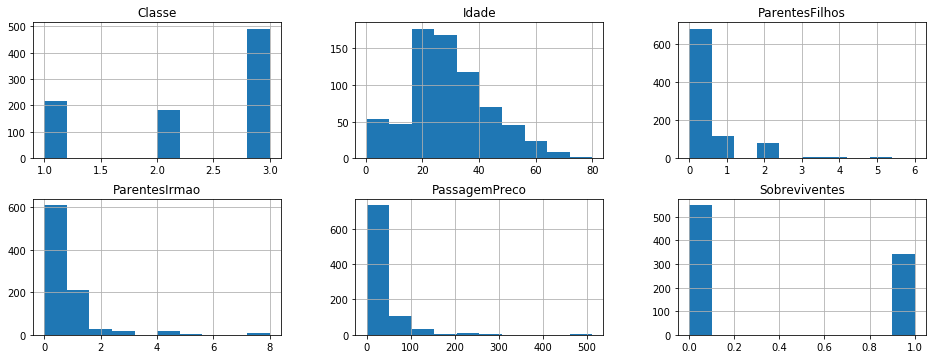

In [69]:
train[colunasGraficos].hist(layout = (3,3))
plt.show()

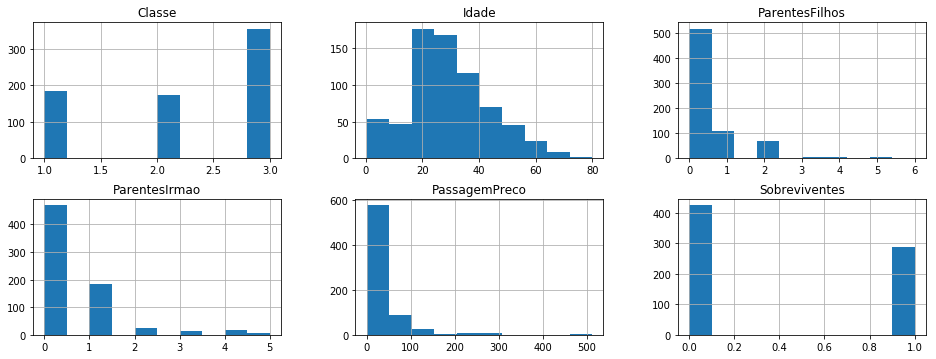

In [70]:
train_dropna[colunasGraficos].hist(layout = (3,3))
plt.show()

## Density Plot Univariado

Mostra se a distribuição está simétrica ou assimétrica.

![title](assimetria.jpg)

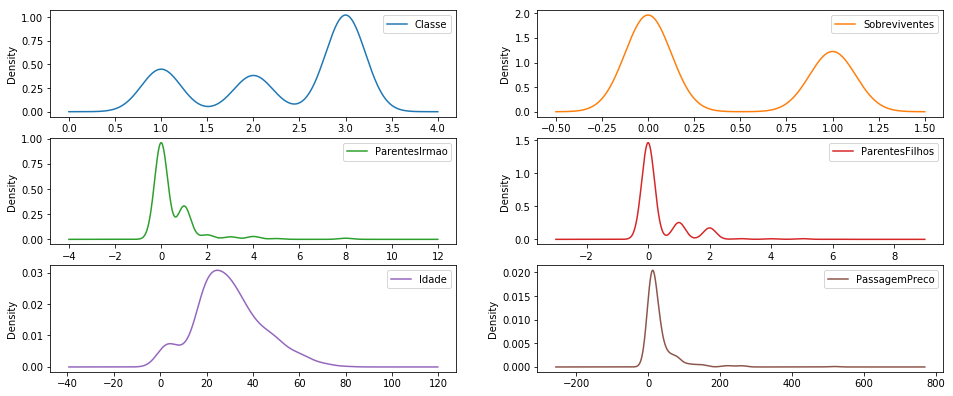

In [71]:
#Sobreviventes     0.478523
#Classe           -0.630548
#Idade             0.389108
#ParentesIrmao     3.695352
#ParentesFilhos    2.749117
#PassagemPreco     4.787317
train[colunasGraficos].plot(kind = 'density', subplots = True, layout = (4,2), sharex = False)
plt.show()

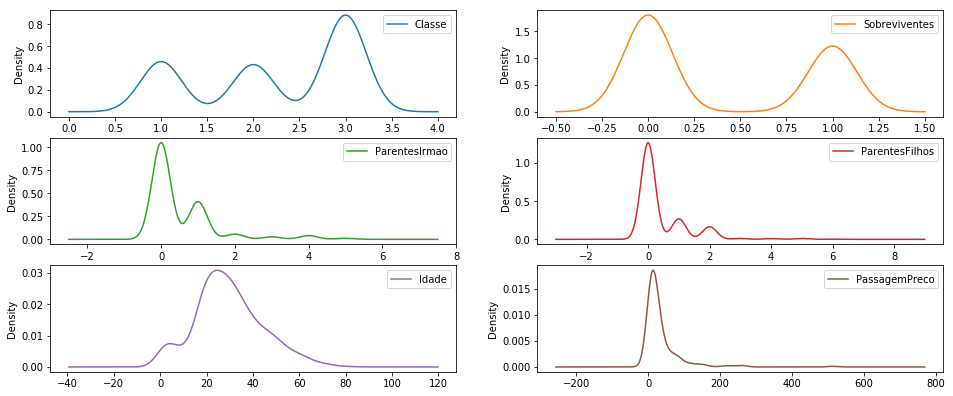

In [72]:
#Sobreviventes     0.390010
#Classe           -0.475604
#Idade             0.388881
#ParentesIrmao     2.515107
#ParentesFilhos    2.614177
#PassagemPreco     4.667009
train_dropna[colunasGraficos].plot(kind = 'density', subplots = True, layout = (4,2), sharex = False)
plt.show()

## BoxPlot

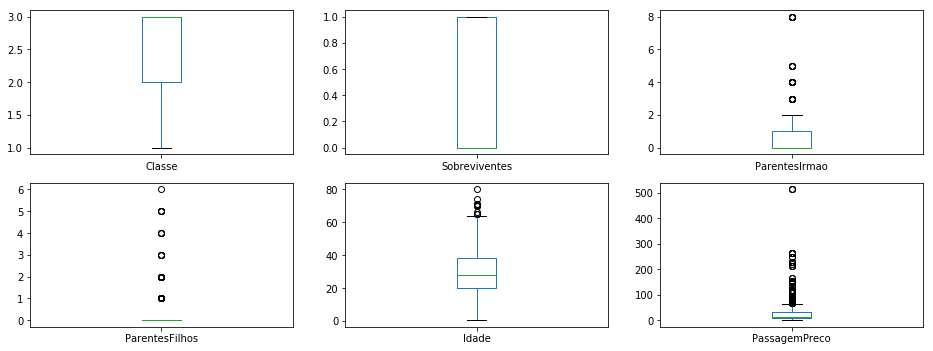

In [73]:
train[colunasGraficos].plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False)
plt.show()

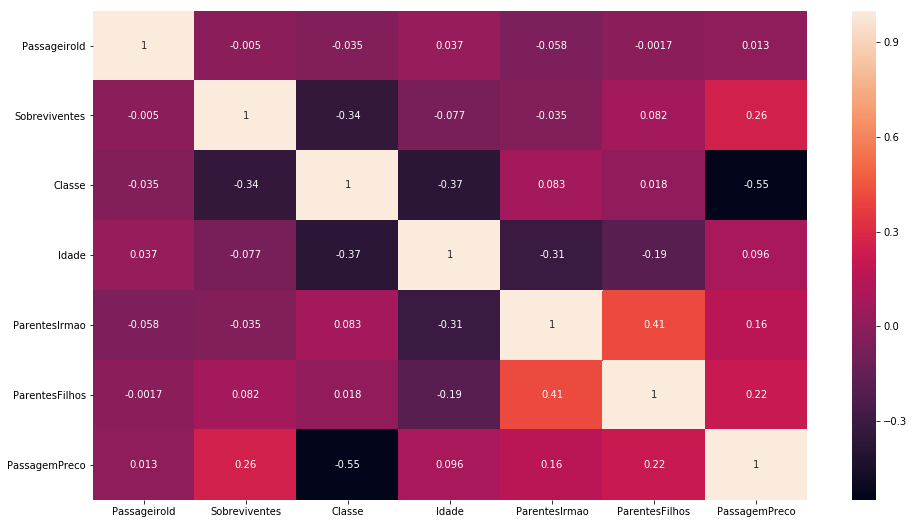

In [74]:
sns.heatmap(train.corr(), annot = True)

# Análise Estatística de Dados

????????????????????????????????????????

# Pré-Processamento

## Coleta de dados

In [75]:
treino = train
teste = test
uniao = join

## Definição do Algoritmos Machine Learning

### No dados de treino de treino, existem dados de saída?

Sim o campo Sobreviventes.

### Qual dos tipos abaixo é  a distribuição do valor que deseja ser previsto?
* Distribuição binomial
* Distribuição de Poisson
* Distribuição geométrica
* Distribuição hipergeométrica
* Distribuição multinomial
* Binonimial negativa

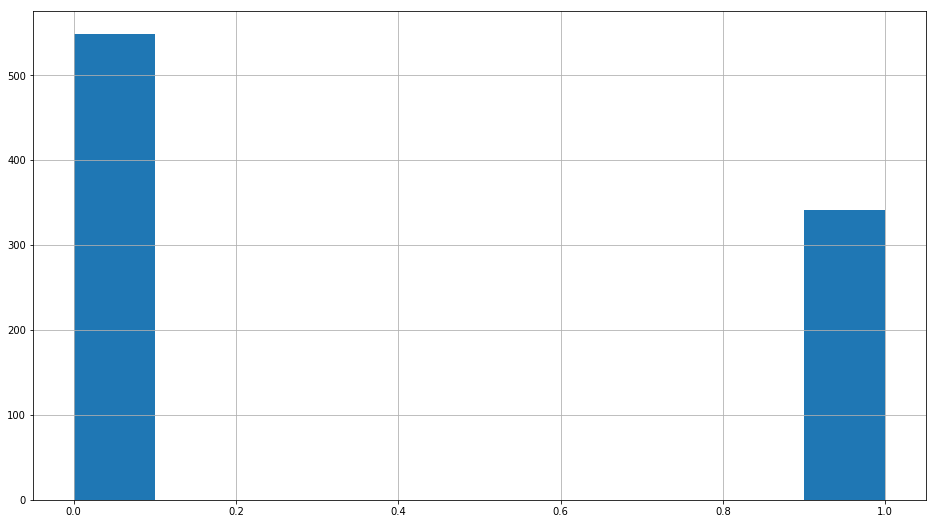

In [76]:
### Resposta: Binomial
train['Sobreviventes'].hist()
plt.show()

* Conforme os dados de treino apresentados, podemos usar os seguintes algoritmos:
    * Supervisionado
        * Extreme Gradient Boosting com XGBoost
        * Random Forest Classifier
    * Não Supervisionado

## Limpeza dos dados

### Handling Missing Values

### Treino
* Idade             177
* Cabine            687
* PortoEmbarque       2

### Teste
* Idade              86
* PassagemPreco       1
* Cabine            327

### Cabine

In [77]:
treino['Cabine'] = treino['Cabine'].fillna('SEM_CABINE')
teste['Cabine'] = teste['Cabine'].fillna('SEM_CABINE')
uniao['Cabine'] = uniao['Cabine'].fillna('SEM_CABINE')
uniao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassageiroId      1309 non-null int64
Classe            1309 non-null int64
Nome              1309 non-null object
Sexo              1309 non-null object
Idade             1046 non-null float64
ParentesIrmao     1309 non-null int64
ParentesFilhos    1309 non-null int64
PassagemNumero    1309 non-null object
PassagemPreco     1308 non-null float64
Cabine            1309 non-null object
PortoEmbarque     1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Porto de Embarque

### Quais os passageiros que não informaram o porto de embarque?

In [78]:
uniao.loc[(uniao['PortoEmbarque'].isnull())]

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Existe mais alguem que tenha a mesma passagem?

In [79]:
### Não.
uniao.loc[(uniao['PassagemNumero']=='113572')]

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### Existe mais alguem que está na mesma cabine?

In [80]:
### Não.
uniao.loc[(uniao['Cabine']=='B28')]

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [81]:
treino['PortoEmbarque'] = treino['PortoEmbarque'].fillna('NA')
uniao['PortoEmbarque'] = uniao['PortoEmbarque'].fillna('NA')
uniao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassageiroId      1309 non-null int64
Classe            1309 non-null int64
Nome              1309 non-null object
Sexo              1309 non-null object
Idade             1046 non-null float64
ParentesIrmao     1309 non-null int64
ParentesFilhos    1309 non-null int64
PassagemNumero    1309 non-null object
PassagemPreco     1308 non-null float64
Cabine            1309 non-null object
PortoEmbarque     1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Passagem Preço

In [82]:
uniao.loc[(uniao['PassagemPreco'].isnull())]

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,SEM_CABINE,S


In [83]:
uniao.loc[(uniao['PassagemNumero']=='3701')]

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,SEM_CABINE,S


In [84]:
uniao.loc[(uniao['PassagemPreco']==0.0)]

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
179,180,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,SEM_CABINE,S
263,264,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,SEM_CABINE,S
277,278,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,SEM_CABINE,S
302,303,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,SEM_CABINE,S
413,414,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,SEM_CABINE,S
466,467,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,SEM_CABINE,S
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,SEM_CABINE,S
597,598,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,SEM_CABINE,S
633,634,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,SEM_CABINE,S


### Quais os passageiros sem cabine pagaram pela passagem com as mesma características?

In [85]:
### Sim alguns.
passageiros=uniao.loc[(uniao['Cabine']=='SEM_CABINE') & (uniao['Idade']>=50.5) & (uniao['PortoEmbarque']=='S') & (uniao['Classe']==3) & (uniao['Sexo']=='male')]
passageiros

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque
94,95,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,SEM_CABINE,S
152,153,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,SEM_CABINE,S
222,223,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,SEM_CABINE,S
326,327,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,SEM_CABINE,S
406,407,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,SEM_CABINE,S
631,632,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,SEM_CABINE,S
851,852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,SEM_CABINE,S
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,SEM_CABINE,S


### Qual a média aritmética do preço da passagem desses passageiros?

In [86]:
passageirosMedia = passageiros['PassagemPreco'].mean()
passageirosMedia

7.4523857142857155

### Atualizar os passageiro com a média aritmética.

In [87]:
uniao.loc[(uniao['PassagemPreco'].isnull()),'PassagemPreco']= passageirosMedia
teste.loc[(teste['PassagemPreco'].isnull()),'PassagemPreco']= passageirosMedia

In [88]:
uniao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassageiroId      1309 non-null int64
Classe            1309 non-null int64
Nome              1309 non-null object
Sexo              1309 non-null object
Idade             1046 non-null float64
ParentesIrmao     1309 non-null int64
ParentesFilhos    1309 non-null int64
PassagemNumero    1309 non-null object
PassagemPreco     1309 non-null float64
Cabine            1309 non-null object
PortoEmbarque     1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [89]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassageiroId      418 non-null int64
Classe            418 non-null int64
Nome              418 non-null object
Sexo              418 non-null object
Idade             332 non-null float64
ParentesIrmao     418 non-null int64
ParentesFilhos    418 non-null int64
PassagemNumero    418 non-null object
PassagemPreco     418 non-null float64
Cabine            418 non-null object
PortoEmbarque     418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [90]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassageiroId      891 non-null int64
Sobreviventes     891 non-null int64
Classe            891 non-null int64
Nome              891 non-null object
Sexo              891 non-null object
Idade             714 non-null float64
ParentesIrmao     891 non-null int64
ParentesFilhos    891 non-null int64
PassagemNumero    891 non-null object
PassagemPreco     891 non-null float64
Cabine            891 non-null object
PortoEmbarque     891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Dataframes com DROPNA

In [91]:
#Valor total - bruto: 891
#Valor total - Sem Nulos: 714
treino_dropna=treino.dropna().copy()
#Valor total - bruto: 1309
#Valor total - Sem Nulos: 1046
uniao_dropna=uniao.dropna().copy()
uniao_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 415
Data columns (total 11 columns):
PassageiroId      1046 non-null int64
Classe            1046 non-null int64
Nome              1046 non-null object
Sexo              1046 non-null object
Idade             1046 non-null float64
ParentesIrmao     1046 non-null int64
ParentesFilhos    1046 non-null int64
PassagemNumero    1046 non-null object
PassagemPreco     1046 non-null float64
Cabine            1046 non-null object
PortoEmbarque     1046 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 98.1+ KB


### Idade

### É possível descobrir a idade pelo tipo de saudação?

In [92]:
### Treino
treinoSliceNome = treino['Nome'].str.split(',', expand=True)
treino['Primeiro Nome']=treinoSliceNome[0]
treinoNomeSlice = treinoSliceNome[1].str.split('.', expand=True,n=1)
treinoComplemntoSlice = treinoNomeSlice[1].str.split('(', expand=True)
treino['Saudação'] = treinoNomeSlice[0]
treino['Sobrenome'] = treinoComplemntoSlice[0]
treino['Complemento'] = treinoComplemntoSlice[1]

In [93]:
### Treino - DROPNA
treino_dropnaSliceNome = treino_dropna['Nome'].str.split(',', expand=True)
treino_dropna['Primeiro Nome']=treino_dropnaSliceNome[0]
treino_dropnaNomeSlice = treino_dropnaSliceNome[1].str.split('.', expand=True,n=1)
treino_dropnaComplemntoSlice = treino_dropnaNomeSlice[1].str.split('(', expand=True)
treino_dropna['Saudação'] = treino_dropnaNomeSlice[0]
treino_dropna['Sobrenome'] = treino_dropnaComplemntoSlice[0]
treino_dropna['Complemento'] = treino_dropnaComplemntoSlice[1]

In [94]:
### Teste
testeSliceNome = teste['Nome'].str.split(',', expand=True)
teste['Primeiro Nome']=testeSliceNome[0]
testeNomeSlice = testeSliceNome[1].str.split('.', expand=True,n=1)
testeComplemntoSlice = testeNomeSlice[1].str.split('(', expand=True)
teste['Saudação'] = testeNomeSlice[0]
teste['Sobrenome'] = testeComplemntoSlice[0]
teste['Complemento'] = testeComplemntoSlice[1]

In [95]:
### União
uniaoSliceNome = uniao['Nome'].str.split(',', expand=True)
uniao['Primeiro Nome']=uniaoSliceNome[0]
uniaoNomeSlice = uniaoSliceNome[1].str.split('.', expand=True,n=1)
uniaoComplemntoSlice = uniaoNomeSlice[1].str.split('(', expand=True)
uniao['Saudação'] = uniaoNomeSlice[0]
uniao['Sobrenome'] = uniaoComplemntoSlice[0]
uniao['Complemento'] = uniaoComplemntoSlice[1]

In [96]:
### União
uniao_dropnaSliceNome = uniao_dropna['Nome'].str.split(',', expand=True)
uniao_dropna['Primeiro Nome']= uniao_dropnaSliceNome[0]
uniao_dropnaNomeSlice = uniao_dropnaSliceNome[1].str.split('.', expand=True,n=1)
uniao_dropnaComplemntoSlice = uniao_dropnaNomeSlice[1].str.split('(', expand=True)
uniao_dropna['Saudação'] = uniao_dropnaNomeSlice[0]
uniao_dropna['Sobrenome'] = uniao_dropnaComplemntoSlice[0]
uniao_dropna['Complemento'] = uniao_dropnaComplemntoSlice[1]

In [97]:
treino['Complemento'] = treino['Complemento'].fillna('NAO_INFORMADO')
treino_dropna['Complemento'] = treino_dropna['Complemento'].fillna('NAO_INFORMADO')
teste['Complemento'] = teste['Complemento'].fillna('NAO_INFORMADO')
uniao['Complemento'] = uniao['Complemento'].fillna('NAO_INFORMADO')
uniao_dropna['Complemento'] = uniao_dropna['Complemento'].fillna('NAO_INFORMADO')
uniao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
PassageiroId      1309 non-null int64
Classe            1309 non-null int64
Nome              1309 non-null object
Sexo              1309 non-null object
Idade             1046 non-null float64
ParentesIrmao     1309 non-null int64
ParentesFilhos    1309 non-null int64
PassagemNumero    1309 non-null object
PassagemPreco     1309 non-null float64
Cabine            1309 non-null object
PortoEmbarque     1309 non-null object
Primeiro Nome     1309 non-null object
Saudação          1309 non-null object
Sobrenome         1309 non-null object
Complemento       1309 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 163.6+ KB


In [98]:
saudacoes = uniao['Saudação'].unique()
saudacoes

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [99]:
quantidadesSaudacoes = np.arange(0, saudacoes.size, dtype=np.int64) 
quantidadesSaudacoes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17], dtype=int64)

In [100]:
treino['SaudacaoNum'] = treino['Saudação'].replace(saudacoes,quantidadesSaudacoes)
treino_dropna['SaudacaoNum'] = treino_dropna['Saudação'].replace(saudacoes,quantidadesSaudacoes)
teste['SaudacaoNum'] = teste['Saudação'].replace(saudacoes,quantidadesSaudacoes)
uniao['SaudacaoNum'] = uniao['Saudação'].replace(saudacoes,quantidadesSaudacoes)
uniao_dropna['SaudacaoNum'] = uniao_dropna['Saudação'].replace(saudacoes,quantidadesSaudacoes)
uniao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
PassageiroId      1309 non-null int64
Classe            1309 non-null int64
Nome              1309 non-null object
Sexo              1309 non-null object
Idade             1046 non-null float64
ParentesIrmao     1309 non-null int64
ParentesFilhos    1309 non-null int64
PassagemNumero    1309 non-null object
PassagemPreco     1309 non-null float64
Cabine            1309 non-null object
PortoEmbarque     1309 non-null object
Primeiro Nome     1309 non-null object
Saudação          1309 non-null object
Sobrenome         1309 non-null object
Complemento       1309 non-null object
SaudacaoNum       1309 non-null int64
dtypes: float64(2), int64(5), object(9)
memory usage: 173.9+ KB


In [101]:
uniao_dropna.corr(method='pearson')

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco,SaudacaoNum
PassageiroId,1.000000,-0.064097,0.028814,-0.050700,-0.021096,0.047391,0.006533
Classe,-0.064097,1.000000,-0.408106,0.047221,0.017224,-0.565414,-0.167782
Idade,0.028814,-0.408106,1.000000,-0.243699,-0.150917,0.177263,-0.086034
ParentesIrmao,-0.050700,0.047221,-0.243699,1.000000,0.374456,0.141421,0.150401
ParentesFilhos,-0.021096,0.017224,-0.150917,0.374456,1.000000,0.216920,0.123687
PassagemPreco,0.047391,-0.565414,0.177263,0.141421,0.216920,1.000000,0.120301
SaudacaoNum,0.006533,-0.167782,-0.086034,0.150401,0.123687,0.120301,1.000000


In [102]:
uniao_dropna.corr(method='spearman')

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco,SaudacaoNum
PassageiroId,1.000000,-0.065678,0.026822,-0.027280,-0.011889,0.018325,-0.019187
Classe,-0.065678,1.000000,-0.395892,-0.076427,-0.020057,-0.751563,-0.106890
Idade,0.026822,-0.395892,1.000000,-0.129929,-0.216097,0.189906,-0.255856
ParentesIrmao,-0.027280,-0.076427,-0.129929,1.000000,0.415589,0.421924,0.241063
ParentesFilhos,-0.011889,-0.020057,-0.216097,0.415589,1.000000,0.386018,0.376191
PassagemPreco,0.018325,-0.751563,0.189906,0.421924,0.386018,1.000000,0.278697
SaudacaoNum,-0.019187,-0.106890,-0.255856,0.241063,0.376191,0.278697,1.000000


In [103]:
uniao_dropna.corr(method = 'kendall')

,PassageiroId,Classe,Idade,ParentesIrmao,ParentesFilhos,PassagemPreco,SaudacaoNum
PassageiroId,1.000000,-0.050922,0.017609,-0.021324,-0.009593,0.012071,-0.014367
Classe,-0.050922,1.000000,-0.312672,-0.070384,-0.018376,-0.629150,-0.095323
Idade,0.017609,-0.312672,1.000000,-0.100050,-0.171702,0.129898,-0.199442
ParentesIrmao,-0.021324,-0.070384,-0.100050,1.000000,0.391842,0.336031,0.222870
ParentesFilhos,-0.009593,-0.018376,-0.171702,0.391842,1.000000,0.310126,0.338056
PassagemPreco,0.012071,-0.629150,0.129898,0.336031,0.310126,1.000000,0.214774
SaudacaoNum,-0.014367,-0.095323,-0.199442,0.222870,0.338056,0.214774,1.000000


In [104]:
colunasNumericasIdade=['Classe','ParentesIrmao','ParentesFilhos','SaudacaoNum','PassagemPreco']
x = pd.DataFrame(treino_dropna,columns=colunasNumericasIdade).values
y = treino_dropna['Idade'].astype('float32')

In [105]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(x,y)
### Quanto maior o score, maior a importância do atributo
print(colunasNumericasIdade)
print(regr.feature_importances_)

['Classe', 'ParentesIrmao', 'ParentesFilhos', 'SaudacaoNum', 'PassagemPreco']
[0.26046346 0.0092698  0.31566442 0.34242019 0.07218213]


In [106]:
### Resposta: Não. Mas futuramente pode ser possível.

## Outliers

### Existe a necessidade de remover os outiliers da Idade?

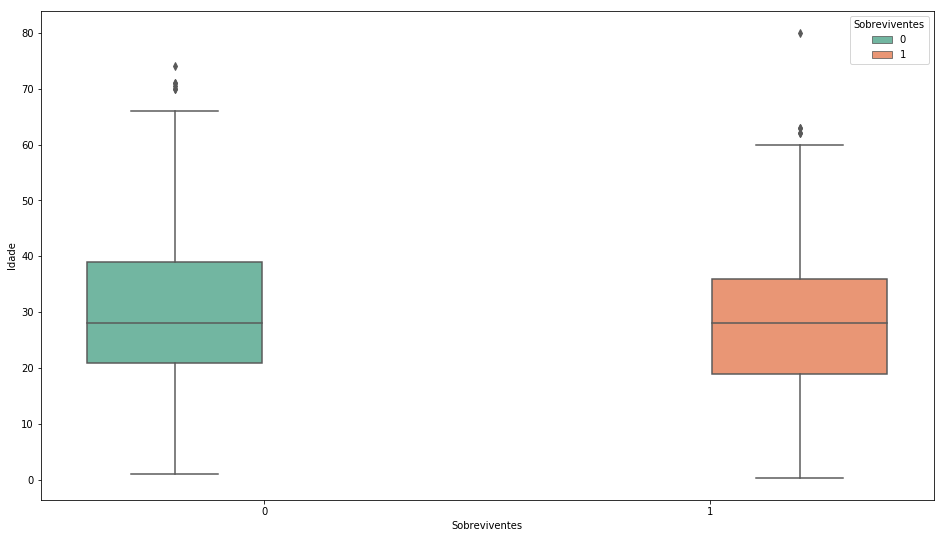

In [107]:
### Os dados de treino e teste são semelhantes nos outliers das idades, não tem necessidade de remover.
sns.boxplot(
    data = treino,
    x='Sobreviventes',
    hue='Sobreviventes',
    y='Idade',
    orient = "v", notch=False, palette="Set2",fliersize=5)

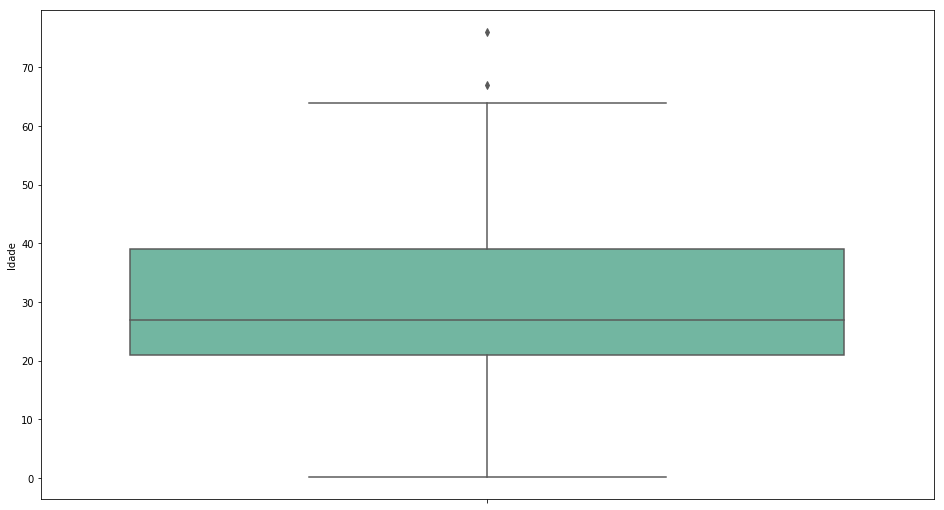

In [108]:
sns.boxplot(
    data = teste,
    y='Idade',
    orient = "v", notch=False, palette="Set2",fliersize=5)

## Análise dados

### Existem dados duplicados?

In [109]:
### Não.

## Formatação

### Existem caracteres inválidos?

In [110]:
### Não.

### Existem caracteres com a acentuação inválida?

In [111]:
### Não.

### Precisa colocar os caracteres como maiúscula ou minúscula?

In [112]:
### Não.

### Precisa remover as stop words?

In [113]:
### Não.

## Transformação

In [114]:
#Sexo
treino['SexoNum']        = treino['Sexo'].replace(['male','female'],[1,0])
treino_dropna['SexoNum'] = treino_dropna['Sexo'].replace(['male','female'],[1,0])
teste['SexoNum']         = teste['Sexo'].replace(['male','female'],[1,0])
uniao['SexoNum']         = uniao['Sexo'].replace(['male','female'],[1,0])
uniao_dropna['SexoNum']  = uniao_dropna['Sexo'].replace(['male','female'],[1,0])
treino.head(2)

,PassageiroId,Sobreviventes,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque,Primeiro Nome,Saudação,Sobrenome,Complemento,SaudacaoNum,SexoNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SEM_CABINE,S,Braund,Mr,Owen Harris,NAO_INFORMADO,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer),1,0


In [115]:
treino['PortoEmbarqueNum']        = treino['PortoEmbarque'].replace([np.nan,'S','C','Q','NA'],[0,1,2,3,4])
treino_dropna['PortoEmbarqueNum'] = treino_dropna['PortoEmbarque'].replace([np.nan,'S','C','Q','NA'],[0,1,2,3,4])
teste['PortoEmbarqueNum']         = teste['PortoEmbarque'].replace([np.nan,'S','C','Q','NA'],[0,1,2,3,4])
uniao['PortoEmbarqueNum']         = uniao['PortoEmbarque'].replace([np.nan,'S','C','Q','NA'],[0,1,2,3,4])
uniao_dropna['PortoEmbarqueNum']  = uniao_dropna['PortoEmbarque'].replace([np.nan,'S','C','Q','NA'],[0,1,2,3,4])
treino.head(2)

,PassageiroId,Sobreviventes,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,PortoEmbarque,Primeiro Nome,Saudação,Sobrenome,Complemento,SaudacaoNum,SexoNum,PortoEmbarqueNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SEM_CABINE,S,Braund,Mr,Owen Harris,NAO_INFORMADO,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley,Florence Briggs Thayer),1,0,2


## Redução de Dimensionalidade - Feature Extraction

### Unir a quantidade de parentes.

In [116]:
treino['FamiliaQtde'] = treino['ParentesIrmao']+ treino['ParentesFilhos']
treino_dropna['FamiliaQtde'] = treino_dropna['ParentesIrmao']+ treino_dropna['ParentesFilhos']
teste['FamiliaQtde']  = teste['ParentesIrmao']+ teste['ParentesFilhos']
uniao['FamiliaQtde']  = uniao['ParentesIrmao']+ uniao['ParentesFilhos']

### O passageiro está sozinho?

In [117]:
treino.loc[(treino['FamiliaQtde']>0),'EstaSozinho']= 0
treino.loc[(treino['FamiliaQtde']==0),'EstaSozinho']= 1

treino_dropna.loc[(treino_dropna['FamiliaQtde']>0),'EstaSozinho']= 0
treino_dropna.loc[(treino_dropna['FamiliaQtde']==0),'EstaSozinho']= 1

teste.loc[(teste['FamiliaQtde']>0),'EstaSozinho']= 0
teste.loc[(teste['FamiliaQtde']==0),'EstaSozinho']= 1

uniao.loc[(uniao['FamiliaQtde']>0),'EstaSozinho']= 0
uniao.loc[(uniao['FamiliaQtde']==0),'EstaSozinho']= 1

### Faixa Etárias

In [118]:
### Faixa Etárias
treino.loc[(treino['Idade']<1),'FaixaEtaria']=1
treino.loc[(treino['Idade']>=1)  & (treino['Idade']<5),'FaixaEtaria']=2
treino.loc[(treino['Idade']>=5)  & (treino['Idade']<10),'FaixaEtaria']=3
treino.loc[(treino['Idade']>=10) & (treino['Idade']<15),'FaixaEtaria']=4
treino.loc[(treino['Idade']>=15) & (treino['Idade']<20),'FaixaEtaria']=5
treino.loc[(treino['Idade']>=20) & (treino['Idade']<25),'FaixaEtaria']=6
treino.loc[(treino['Idade']>=25) & (treino['Idade']<30),'FaixaEtaria']=7
treino.loc[(treino['Idade']>=30) & (treino['Idade']<35),'FaixaEtaria']=8
treino.loc[(treino['Idade']>=35) & (treino['Idade']<40),'FaixaEtaria']=9
treino.loc[(treino['Idade']>=40) & (treino['Idade']<45),'FaixaEtaria']=10
treino.loc[(treino['Idade']>=45) & (treino['Idade']<50),'FaixaEtaria']=11
treino.loc[(treino['Idade']>=50) & (treino['Idade']<55),'FaixaEtaria']=12
treino.loc[(treino['Idade']>=55) & (treino['Idade']<60),'FaixaEtaria']=13
treino.loc[(treino['Idade']>=60) & (treino['Idade']<65),'FaixaEtaria']=14
treino.loc[(treino['Idade']>=65) & (treino['Idade']<70),'FaixaEtaria']=15
treino.loc[(treino['Idade']>=70) & (treino['Idade']<75),'FaixaEtaria']=16
treino.loc[(treino['Idade']>=75) & (treino['Idade']<80),'FaixaEtaria']=17
treino.loc[(treino['Idade']>=80),'FaixaEtaria']=18

treino_dropna.loc[(treino_dropna['Idade']<1),'FaixaEtaria']=1
treino_dropna.loc[(treino_dropna['Idade']>=1)  & (treino_dropna['Idade']<5),'FaixaEtaria']=2
treino_dropna.loc[(treino_dropna['Idade']>=5)  & (treino_dropna['Idade']<10),'FaixaEtaria']=3
treino_dropna.loc[(treino_dropna['Idade']>=10) & (treino_dropna['Idade']<15),'FaixaEtaria']=4
treino_dropna.loc[(treino_dropna['Idade']>=15) & (treino_dropna['Idade']<20),'FaixaEtaria']=5
treino_dropna.loc[(treino_dropna['Idade']>=20) & (treino_dropna['Idade']<25),'FaixaEtaria']=6
treino_dropna.loc[(treino_dropna['Idade']>=25) & (treino_dropna['Idade']<30),'FaixaEtaria']=7
treino_dropna.loc[(treino_dropna['Idade']>=30) & (treino_dropna['Idade']<35),'FaixaEtaria']=8
treino_dropna.loc[(treino_dropna['Idade']>=35) & (treino_dropna['Idade']<40),'FaixaEtaria']=9
treino_dropna.loc[(treino_dropna['Idade']>=40) & (treino_dropna['Idade']<45),'FaixaEtaria']=10
treino_dropna.loc[(treino_dropna['Idade']>=45) & (treino_dropna['Idade']<50),'FaixaEtaria']=11
treino_dropna.loc[(treino_dropna['Idade']>=50) & (treino_dropna['Idade']<55),'FaixaEtaria']=12
treino_dropna.loc[(treino_dropna['Idade']>=55) & (treino_dropna['Idade']<60),'FaixaEtaria']=13
treino_dropna.loc[(treino_dropna['Idade']>=60) & (treino_dropna['Idade']<65),'FaixaEtaria']=14
treino_dropna.loc[(treino_dropna['Idade']>=65) & (treino_dropna['Idade']<70),'FaixaEtaria']=15
treino_dropna.loc[(treino_dropna['Idade']>=70) & (treino_dropna['Idade']<75),'FaixaEtaria']=16
treino_dropna.loc[(treino_dropna['Idade']>=75) & (treino_dropna['Idade']<80),'FaixaEtaria']=17
treino_dropna.loc[(treino_dropna['Idade']>=80),'FaixaEtaria']=18

teste.loc[(teste['Idade']<1),'FaixaEtaria']=1
teste.loc[(teste['Idade']>=1)  & (teste['Idade']<5),'FaixaEtaria']=2
teste.loc[(teste['Idade']>=5)  & (teste['Idade']<10),'FaixaEtaria']=3
teste.loc[(teste['Idade']>=10) & (teste['Idade']<15),'FaixaEtaria']=4
teste.loc[(teste['Idade']>=15) & (teste['Idade']<20),'FaixaEtaria']=5
teste.loc[(teste['Idade']>=20) & (teste['Idade']<25),'FaixaEtaria']=6
teste.loc[(teste['Idade']>=25) & (teste['Idade']<30),'FaixaEtaria']=7
teste.loc[(teste['Idade']>=30) & (teste['Idade']<35),'FaixaEtaria']=8
teste.loc[(teste['Idade']>=35) & (teste['Idade']<40),'FaixaEtaria']=9
teste.loc[(teste['Idade']>=40) & (teste['Idade']<45),'FaixaEtaria']=10
teste.loc[(teste['Idade']>=45) & (teste['Idade']<50),'FaixaEtaria']=11
teste.loc[(teste['Idade']>=50) & (teste['Idade']<55),'FaixaEtaria']=12
teste.loc[(teste['Idade']>=55) & (teste['Idade']<60),'FaixaEtaria']=13
teste.loc[(teste['Idade']>=60) & (teste['Idade']<65),'FaixaEtaria']=14
teste.loc[(teste['Idade']>=65) & (teste['Idade']<70),'FaixaEtaria']=15
teste.loc[(teste['Idade']>=70) & (teste['Idade']<75),'FaixaEtaria']=16
teste.loc[(teste['Idade']>=75) & (teste['Idade']<80),'FaixaEtaria']=17
teste.loc[(teste['Idade']>=80),'FaixaEtaria']=18

uniao.loc[(uniao['Idade']<1),'FaixaEtaria']=1
uniao.loc[(uniao['Idade']>=1)  & (uniao['Idade']<5),'FaixaEtaria']=2
uniao.loc[(uniao['Idade']>=5)  & (uniao['Idade']<10),'FaixaEtaria']=3
uniao.loc[(uniao['Idade']>=10) & (uniao['Idade']<15),'FaixaEtaria']=4
uniao.loc[(uniao['Idade']>=15) & (uniao['Idade']<20),'FaixaEtaria']=5
uniao.loc[(uniao['Idade']>=20) & (uniao['Idade']<25),'FaixaEtaria']=6
uniao.loc[(uniao['Idade']>=25) & (uniao['Idade']<30),'FaixaEtaria']=7
uniao.loc[(uniao['Idade']>=30) & (uniao['Idade']<35),'FaixaEtaria']=8
uniao.loc[(uniao['Idade']>=35) & (uniao['Idade']<40),'FaixaEtaria']=9
uniao.loc[(uniao['Idade']>=40) & (uniao['Idade']<45),'FaixaEtaria']=10
uniao.loc[(uniao['Idade']>=45) & (uniao['Idade']<50),'FaixaEtaria']=11
uniao.loc[(uniao['Idade']>=50) & (uniao['Idade']<55),'FaixaEtaria']=12
uniao.loc[(uniao['Idade']>=55) & (uniao['Idade']<60),'FaixaEtaria']=13
uniao.loc[(uniao['Idade']>=60) & (uniao['Idade']<65),'FaixaEtaria']=14
uniao.loc[(uniao['Idade']>=65) & (uniao['Idade']<70),'FaixaEtaria']=15
uniao.loc[(uniao['Idade']>=70) & (uniao['Idade']<75),'FaixaEtaria']=16
uniao.loc[(uniao['Idade']>=75) & (uniao['Idade']<80),'FaixaEtaria']=17
uniao.loc[(uniao['Idade']>=80),'FaixaEtaria']=18

### O passageiro tem cabine?

In [119]:
treino.loc[treino['Cabine'].notnull(),'TemCabine'] = 1
treino.loc[treino['Cabine']=='SEM_CABINE','TemCabine'] = 0

treino_dropna.loc[treino_dropna['Cabine'].notnull(),'TemCabine'] = 1
treino_dropna.loc[treino_dropna['Cabine']=='SEM_CABINE','TemCabine'] = 0

teste.loc[teste['Cabine'].notnull(),'TemCabine'] = 1
teste.loc[teste['Cabine']=='SEM_CABINE','TemCabine'] = 0

uniao.loc[uniao['Cabine'].notnull(),'TemCabine'] = 1
uniao.loc[uniao['Cabine']=='SEM_CABINE','TemCabine'] = 0

In [120]:
uniao

,PassageiroId,Classe,Nome,Sexo,Idade,ParentesIrmao,ParentesFilhos,PassagemNumero,PassagemPreco,Cabine,...,Saudação,Sobrenome,Complemento,SaudacaoNum,SexoNum,PortoEmbarqueNum,FamiliaQtde,EstaSozinho,FaixaEtaria,TemCabine
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,SEM_CABINE,...,Mr,Owen Harris,NAO_INFORMADO,0,1,1,1,0.0,6.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,Mrs,John Bradley,Florence Briggs Thayer),1,0,2,1,0.0,9.0,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,SEM_CABINE,...,Miss,Laina,NAO_INFORMADO,2,0,1,0,1.0,7.0,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,Mrs,Jacques Heath,Lily May Peel),1,0,1,1,0.0,9.0,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,SEM_CABINE,...,Mr,William Henry,NAO_INFORMADO,0,1,1,0,1.0,9.0,0.0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,SEM_CABINE,...,Mr,James,NAO_INFORMADO,0,1,3,0,1.0,NaN,0.0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,...,Mr,Timothy J,NAO_INFORMADO,0,1,1,0,1.0,12.0,1.0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,SEM_CABINE,...,Master,Gosta Leonard,NAO_INFORMADO,3,1,1,4,0.0,2.0,0.0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,SEM_CABINE,...,Mrs,Oscar W,Elisabeth Vilhelmina Berg),1,0,1,2,0.0,7.0,0.0
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,SEM_CABINE,...,Mrs,Nicholas,Adele Achem),1,0,2,1,0.0,4.0,0.0


## Correlação

In [121]:
colunasNumericasIdade=['Classe','FaixaEtaria','ParentesIrmao','ParentesFilhos','SaudacaoNum','PassagemPreco','SexoNum','PortoEmbarqueNum','FamiliaQtde','EstaSozinho','TemCabine']
x = pd.DataFrame(treino_dropna,columns=colunasNumericasIdade).values
y = treino_dropna['Idade'].astype('float32')

In [122]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(x,y)
### Quanto maior o score, maior a importância do atributo
print(colunasNumericasIdade)
print(regr.feature_importances_)

['Classe', 'FaixaEtaria', 'ParentesIrmao', 'ParentesFilhos', 'SaudacaoNum', 'PassagemPreco', 'SexoNum', 'PortoEmbarqueNum', 'FamiliaQtde', 'EstaSozinho', 'TemCabine']
[2.83470959e-05 9.99539396e-01 0.00000000e+00 3.69411851e-05
 4.29142982e-05 3.06015214e-04 0.00000000e+00 1.58116532e-05
 1.41927969e-05 0.00000000e+00 1.63815836e-05]


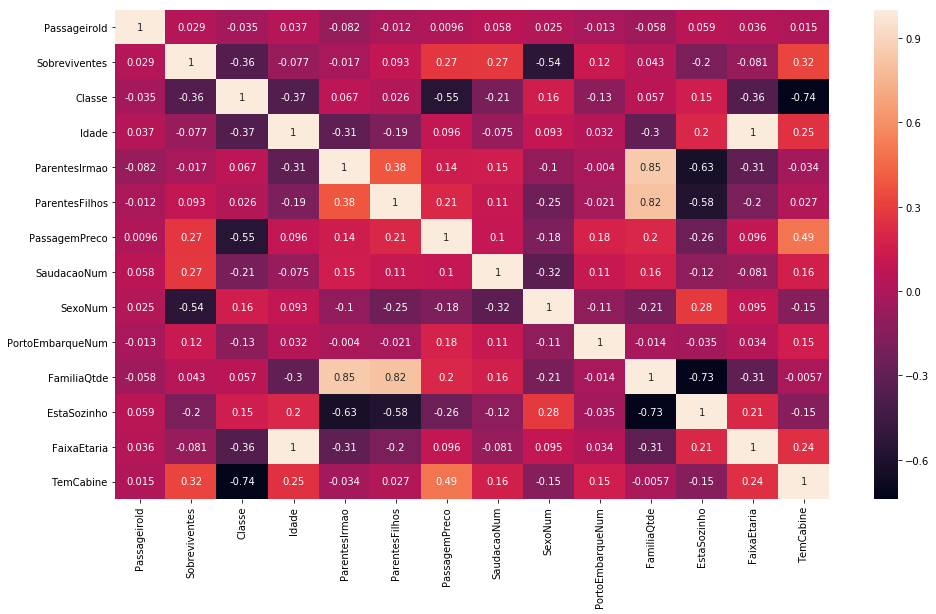

In [123]:
sns.heatmap(treino_dropna.corr(), annot = True)

# Gerando Dados para Aplicar ML

In [124]:
colunasTreino=[
    'PassageiroId',
    'FaixaEtaria',
    'Classe',
    'PortoEmbarqueNum',
    'ParentesIrmao',
    'ParentesFilhos',
    'SexoNum',
    'SaudacaoNum',
    'PassagemPreco',
    'FamiliaQtde',
    'EstaSozinho',
    'TemCabine',
    'Sobreviventes'
]

In [125]:
colunasTeste=[
    'PassageiroId',
    'FaixaEtaria',
    'Classe',
    'PortoEmbarqueNum',
    'ParentesIrmao',
    'ParentesFilhos',
    'SexoNum',
    'SaudacaoNum',
    'PassagemPreco',
    'FamiliaQtde',
    'EstaSozinho',
    'TemCabine',
    'FamiliaQtde'
]

In [126]:
resultado_treino_dropna=treino_dropna[colunasTreino]
resultado_treino=treino[colunasTreino]
resultado_teste=teste[colunasTeste]

In [127]:
resultado_treino_dropna.to_csv('r_treino_dropna.csv', index=False)
resultado_treino.to_csv('r_treino.csv', index=False)
resultado_teste.to_csv('r_teste.csv', index=False)